## Final Project Submission

Please fill out:
* Student name: Cristina Mulas
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [12]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
# the most correlation  and eveling distributed
# do the summaries for all of these
 #bathrooms , sqft_living , grade ,sqft_above  and sqft_living15 
#normalize the prize and all sqrfodos # do the logs to normalize the dataaa
# np.log(np.log())

In [13]:
# read the file
df = pd.read_csv('kc_house_data.csv')
#see the first five rows
# df.head()


In [14]:
# see the last five rows
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [15]:

# data types and non-null values of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [16]:
# descriptibe statistics for all columns
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [17]:
# DATA CLEANING
# it gives you the sum of null values in a column
df.isnull().sum()


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [18]:
# view missing values
df.view.isnull().sum()
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [19]:
# repleace the NA values with zero values since we have many zeros values
df.view.fillna(0,inplace=True)

In [20]:
# Ckeck maybe remove latter
df.view.value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [21]:
# waterfront missing values
df.waterfront.value_counts()


0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [22]:
## repleace the NA values with zero values since we have many zeros values
df.waterfront.fillna(0,inplace=True)

In [23]:
#to check it mayb remove latter
df.waterfront.value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [24]:
# year_renovated missing values
# convert categorical values into numeric
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')


In [25]:
# replace the '?' to NA
df['sqft_basement'] = df['sqft_basement'].replace(0.0, np.nan)


In [26]:
# replace NA value to the median
df['sqft_basement'] = df['sqft_basement'].fillna(df['sqft_basement'].median())

In [27]:
# to check it
df.sqft_basement[6]

700.0

In [28]:
#In which days houses are the most selling?
#check out the type of the column
df.date.dtype

dtype('O')

In [29]:
# only one year of diference
df.date.max()
df.date.min()

'1/10/2015'

In [36]:
#converted into datetime
df['date'] = pd.to_datetime(df['date'])

In [37]:
# to ckeck
df.date.head()


0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

KeyError: 'day'

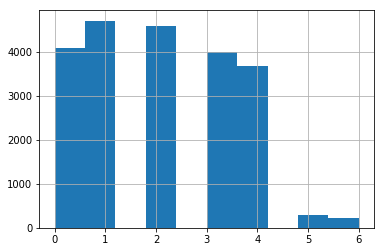

In [73]:
#create a column that uses the timestamp to determine day of the week
# df['weekday'] = df['date'].dt.dayofweek # days of the week converted to numbers

 days = df.weekday.value_counts()
 days   
#     .sort_index()
# gives the frequency the most day is Tuesday (Monday=0, Sunday=6)
# df['days'] = ['Monday', 'Tueday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# df2.reindex(date_index2)

# df.weekday.hist()

weekday = {0 : 'Monday', 1: 'Tuesday',2: 'Wednesday', 3:'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday' }


day_count  = weekday.value_counts()
plt.figure(figsize=(15,8))
sns.barplot(day_count.index, day_count.values, alpha=0.8)
plt.title('When Are Most Homes Bo')
plt.ylabel('Number of Sales', fontsize=12)
plt.xlabel('Day of Week', fontsize=12)
plt.show()




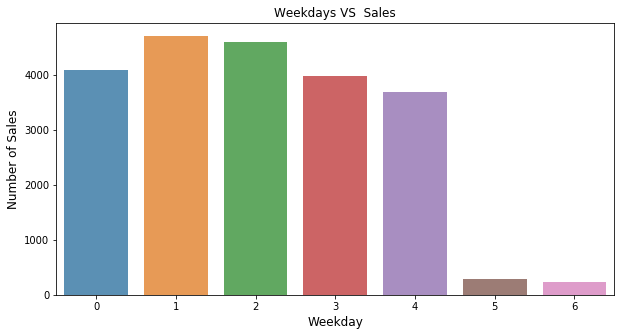

In [83]:

days = df.weekday.value_counts() # frequency
days_count = days[:10,]
plt.figure(figsize=(10,5))
sns.barplot(days_count.index, days_count.values, alpha=0.8)
plt.title('Weekdays VS  Sales')
plt.ylabel('Number of Sales', fontsize=12)
plt.xlabel('Weekday', fontsize=12)
plt.show()

In [39]:
df_dayweek.head()

0       Monday
1      Tuesday
2    Wednesday
3      Tuesday
4    Wednesday
Name: date, dtype: object

In [ ]:
# plt.hist(df_dayweek)


In [ ]:
# correlation
corr = df.corr()

In [ ]:
sns.heatmap(abs(corr), cmap ="YlGnBu",linewidths=.5 )

In [ ]:
#normalize the prize and all sqrfodos # do the logs to normalize the dataaa
df.price = np.log(df.price)
df.sqft_above = np.log(df.sqft_basement)
df.

In [ ]:
corr = df.corr()


In [ ]:
abs(df.corr() > 0.6)
# the more sqr 

In [ ]:
sns.heatmap(abs(corr), cmap ="YlGnBu",linewidths=.5 )

In [34]:
#data frame filter by 0.75 loop up these values correlated 
df.corr()[(df.corr() >.75)]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,NaN,NaN,NaN,1.000000,0.755758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_living,NaN,NaN,NaN,0.755758,1.000000,NaN,NaN,NaN,NaN,NaN,0.762779,0.876448,NaN,NaN,NaN,NaN,NaN,0.756402,NaN
sqft_lot,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floors,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# pd.plotting.scatter_matrix(df, figsize =[10 ,10])
import statsmodels.formula.api as smf

model = smf.ols('price ~ df.sqft_above', df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                 1.249e+04
Date:                Tue, 18 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:36:41   Log-Likelihood:            -3.0246e+05
No. Observations:               21597   AIC:                         6.049e+05
Df Residuals:                   21595   BIC:                         6.049e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.976e+04   4737.581     12.613

In [20]:
df.fillna(df.waterfront.values_counts)

AttributeError: 'Series' object has no attribute 'values_counts'

In [84]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'weekday', 'days'],
      dtype='object')

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = df.view.values
y = [[df.sqft_living, df.sqft_living15]]
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 1/3, random_state = 0)
linearRegressor = LinearRegression() # create the model
linearRegressor.fit(xTrain, yTrain) # train the model
yPrediction = linearRegressor.predict(xTest) # BOOM

ValueError: Found input variables with inconsistent numbers of samples: [21597, 1]

NameError: name 'a' is not defined

In [24]:
# sns.scatterpllot(np.log)

In [25]:
# sqft_basement '?'
#only one row

df.sqft_basement.unique()

# df.sqft_basement.value_counts(normalize=True)

#Replace ? with difference between sqft_above and sqft_living
df['sqft_basement'] = pd.sqft_basement(ID, errors='coerce')

df['sqft_basement'] = df['sqft_basement'].replace(to_replace='?', value = 0, inplace=False)
df['sqft_basement'][6] 
df.sqft_basement.unique()
df.sqft_basement = pd.to_numeric(df.sqft_basement, errors='coerce')
df['sqft_basement'] = df['sqft_basement'].replace('?', 0)



AttributeError: module 'pandas' has no attribute 'sqft_basement'

In [26]:
df.sqft_basement

0           0.0
1         400.0
2           0.0
3         910.0
4           0.0
5        1530.0
6             ?
7           0.0
8         730.0
9           0.0
10       1700.0
11        300.0
12          0.0
13          0.0
14          0.0
15        970.0
16          0.0
17          0.0
18            ?
19          0.0
20        760.0
21        720.0
22          0.0
23          0.0
24          0.0
25          0.0
26        700.0
27          0.0
28        730.0
29          0.0
          ...  
21567       0.0
21568     320.0
21569       0.0
21570       0.0
21571       0.0
21572     190.0
21573       0.0
21574    1800.0
21575       0.0
21576       0.0
21577       0.0
21578       0.0
21579      50.0
21580       0.0
21581         ?
21582       0.0
21583       0.0
21584       0.0
21585       0.0
21586       0.0
21587       0.0
21588       0.0
21589       0.0
21590     910.0
21591     130.0
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: sqft_basement, Len

In [27]:
# fill with Na and them to the mean
df.sqft_basement


0           0.0
1         400.0
2           0.0
3         910.0
4           0.0
5        1530.0
6             ?
7           0.0
8         730.0
9           0.0
10       1700.0
11        300.0
12          0.0
13          0.0
14          0.0
15        970.0
16          0.0
17          0.0
18            ?
19          0.0
20        760.0
21        720.0
22          0.0
23          0.0
24          0.0
25          0.0
26        700.0
27          0.0
28        730.0
29          0.0
          ...  
21567       0.0
21568     320.0
21569       0.0
21570       0.0
21571       0.0
21572     190.0
21573       0.0
21574    1800.0
21575       0.0
21576       0.0
21577       0.0
21578       0.0
21579      50.0
21580       0.0
21581         ?
21582       0.0
21583       0.0
21584       0.0
21585       0.0
21586       0.0
21587       0.0
21588       0.0
21589       0.0
21590     910.0
21591     130.0
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: sqft_basement, Len

In [28]:
df.sqft_basement[5]

'1530.0'

In [29]:
#df['sqft_basement'][6] 
#df.sqft_basement.value_counts()
#col_med = df.sqft_basement.median()

In [30]:
col_med

NameError: name 'col_med' is not defined

In [31]:
# df.plot.kde()

In [32]:
df.p

AttributeError: 'DataFrame' object has no attribute 'p'

In [ ]:
df.hist(bins = 50 , fi)

In [ ]:
#normalize the prize and all sqrfodos # do the logs to normalize the dataaa
df.price = np.log(df.price)
df.sqft_above = np.log(df.sqft_basement)
df.